# --------------------------- ROAD TRAFFIC SIGN RECOGNITION -----------------------------

## Importing the required libraries

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import to_categorical

In [8]:
from PIL import Image
import os

## Data Interpretation and fetching the path of the required directory

In [12]:
train_dataset = pd.read_csv("train.csv")

In [13]:
train_dataset.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


### The annotation used in the above dataset can be interpreted as follows:
#### Roi.X1 :  The top-left coordinate of the bounding box is represented as Roi.X1
#### Roi.Y1 :  The top-right coordinate of the bounding box is represented as Roi.X2
#### Roi.X2 :  The bottom-left coordinate of the bounding box is represented as Roi.Y1
#### Roi.Y2 :  The bottom-right coordinate of the bounding box is represented as Roi.Y2

#### Path : The path in the dataset points to the respective image in 'Train' folder which contains various classes of the traffic signs as made available by the German Traffic Sign Recognition Benchmark (GTSRB)

### The same interpretation goes with the 'test.csv' dataset

In [14]:
test_dataset = pd.read_csv("test.csv")

In [15]:
test_dataset.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [16]:
data = []
labels = []

classes = 43

cur_path = os.getcwd()

## Appending the traffic sign images and their respective labels as present in the 'Train' dataset to the empty arrays created above

In [18]:
for i in range (classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [19]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


### Performing train_test_split ()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### Now we need to convert array of labelled data (i.e; from 0 to 43-1 classes) to one hot vector

In [22]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# To classify the images into their respective categories, we will build a CNN model.

## Creating the model architecture

In [23]:
# Creating a Sequential() model by passing a list of layer instances as present in the further steps.
model = Sequential()

# We need to implement a convo layer to extract the features of the images.
# Also, here we are utilising the ReLU activation layer to convert all negative values to zero.
# Convolution Layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# After the construction of the above convolution layer. Now we need to apply max pooling
# This is required so as to reduce the spatial volume of the image before feeding the above convo layer to the Fully Connected layer. 
# Pooling Layer 1
model.add(MaxPool2D(pool_size=(2,2)))

# The dropout layer prevents overfitting and removes some of the neurons while the model is being trained. Hence we are required to implement this layer in our CNN model architechture.
# We are choosing the dropout rate as 0.25 because it helps in gradually increasing the accuracy and reducing the loss.
# Dropout layer 1
model.add(Dropout(rate=0.25))

# Convolution Layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Pooling Layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer 2
model.add(Dropout(rate=0.25))

# The next step is to implement a Flatten layer to transform a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.
model.add(Flatten())

# After the implementation of the above steps we are required to create a Fully Connected Layer (Dense Layer).
# Here the results of the above 2 convolutional layers are fed through to generate a prediction.
# To this dense layer we need to again add a dropout layer.
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

# As the problem statement is a mutli classification problem we are required to use softmax in the last layer of the CNN.
model.add(Dense(43, activation='softmax'))

# We need to compile the model with Adam Optimizer as it performs well and categorical_crossentropy because our dataset has multiple classes to be classified.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Predicting the above model architechture over the 'Train' dataset and calculating its accuracy.

#### After building the model architecture, we need to train the model using model.fit(). I tried with batch sizes 32 and 64. The model performed better with 64. Hence I chose the batch_size in model.fit() as 64.

In [24]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 107s 218ms/step - loss: 1.7091 - accuracy: 0.5709 - val_loss: 0.4278 - val_accuracy: 0.8975
Epoch 2/15
491/491 [==============================] - 109s 221ms/step - loss: 0.4863 - accuracy: 0.8632 - val_loss: 0.1384 - val_accuracy: 0.9654
Epoch 3/15
491/491 [==============================] - 100s 204ms/step - loss: 0.2904 - accuracy: 0.9186 - val_loss: 0.1142 - val_accuracy: 0.9711
Epoch 4/15
491/491 [==============================] - 104s 211ms/step - loss: 0.2184 - accuracy: 0.9388 - val_loss: 0.0769 - val_accuracy: 0.9801
Epoch 5/15
491/491 [==============================] - 99s 202ms/step - loss: 0.1685 - accuracy: 0.9500 - val_loss: 0.0601 - val_accuracy: 0.9865
Epoch 6/15
491/491 [==============================] - 97s 197ms/step - loss: 0.1662 - accuracy: 0.9528 - val_loss: 0.0528 - val_accuracy: 0.9872
Epoch 7/15
491/491 [==============================] - 99s 201ms/step - loss: 0.1525 - accuracy: 0.9588 - val_loss: 0.0493 - va

## Visualizing the obtained training accuracy & the val_accuracy per epoch by plotting a simple graph between them.

Text(0, 0.5, 'Accuracy')

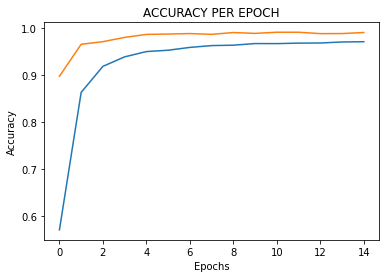

In [25]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('ACCURACY PER EPOCH')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Visualizing the obtained training loss & the val_loss per epoch by plotting a simple graph between them.

Text(0, 0.5, 'loss')

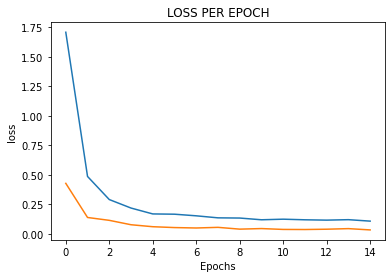

In [26]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('LOSS PER EPOCH')
plt.xlabel('Epochs')
plt.ylabel('loss')

## Conclusions from the above two plots:


### >> From the above two plots we can observe that the two acc. (acc and val_acc) are increasing & the two losses (both loss and val_loss) are decreasing. So this indicates that the model has been trained in a good way and we can further train this model over the unseen or the test data.

### >> In the 'LOSS PER EPOCH' plot we can observe that the accuracies (both accuracy and val_accuracy) stopped increasing at the 13th epoch. So, we should stop training the model at this point. Else, the model would overfit. This is the reason why I chose the max number of epochs as 15. 

## Now we need to implement our model architechture over the 'Test' data.

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)
pred = model.predict_classes(X_test)

print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9637371338083928


## Saving the prediction results of the 'Test' dataset in a heirarchical data file (i.e; hdf5 format)

In [29]:
model.save('model_RTSR.h5')

## The above saved file can be loaded and utilised in the python file 'interface.py'